In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [41]:
# create random weights of n x d
def create_random_weights(n, d):
    return np.random.rand(n, d)

weights = create_random_weights(100, 10) # will be replaced by actual test weights
weights.shape

(100, 10)

In [42]:
# create training data
def create_training_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

data = create_training_data(100, 10) # will be replaced by actual training
data[0].shape, data[1].shape

((100, 10), (100,))

In [43]:
# create a function to calculate the loss
def calculate_loss(weights, X, y):
    predictions = np.dot(X, weights.T)
    loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
    return loss


In [44]:
# test the calculate_loss function
loss = calculate_loss(weights, data[0], data[1])
print(f"Calculated Loss: {loss}")

Calculated Loss: 4.637870232710953


In [45]:
# create a function to plot the loss
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(losses)), y=losses)
    plt.title('Loss Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [46]:
# create a forward pass function
def forward_pass(X, weights):
    return np.dot(X, weights.T)

In [47]:
# create a backward pass function using newtons method
def backward_pass(X, y, weights):
    predictions = forward_pass(X, weights)
    errors = predictions - y.reshape(-1, 1)
    gradients = np.dot(errors.T, X) / len(y)
    return gradients


In [48]:
def newtons_method(X, y, max_iter=100, tolerance=1e-6):
    # Initialize parameters (theta)
    theta = np.zeros(X.shape[1])

    for _ in range(max_iter):
        predictions = X.dot(theta)

        # Gradient (first derivative of loss)
        gradient = -2 * X.T.dot(y - predictions) / len(y)
        
        # Hessian (second derivative of loss)
        hessian = 2 * X.T.dot(X) / len(y)
        
        # Update rule
        theta_new = theta - np.linalg.inv(hessian).dot(gradient)
        
        # Check for convergence
        if np.linalg.norm(theta_new - theta) < tolerance:
            break
        theta = theta_new
        
    return theta

# Example usage of Newton's method
new_weights = newtons_method(data[0], data[1])
# Calculate loss with new weights
new_loss = calculate_loss(new_weights, data[0], data[1])
print(f"New Weights: {new_weights}")
print(f"New Loss: {new_loss}")

New Weights: [ 0.05640097  0.03976417  0.09297033  0.21428696  0.06039455  0.22769496
  0.08929032 -0.0030833   0.03473607  0.19327666]
New Loss: 0.09339464438718376


In [49]:
# create a function to update weights
def update_weights(weights, gradients, learning_rate=0.01):
    return weights - learning_rate * gradients

In [50]:
# create a function to train the model
def train_model(X, y, weights, iterations=100, learning_rate=0.01):
    losses = []
    for i in range(iterations):
        gradients = backward_pass(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        loss = calculate_loss(weights, X, y)
        losses.append(loss)
        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return weights, losses

Iteration 0, Loss: 4.416830284071844
Iteration 10, Loss: 2.7237612524344486
Iteration 20, Loss: 1.700607089356456
Iteration 30, Loss: 1.0821299144203524
Iteration 40, Loss: 0.7081102719719843
Iteration 50, Loss: 0.4817660069245665
Iteration 60, Loss: 0.3446348236949551
Iteration 70, Loss: 0.26140187661962383
Iteration 80, Loss: 0.21073474343029946
Iteration 90, Loss: 0.17974721089661153


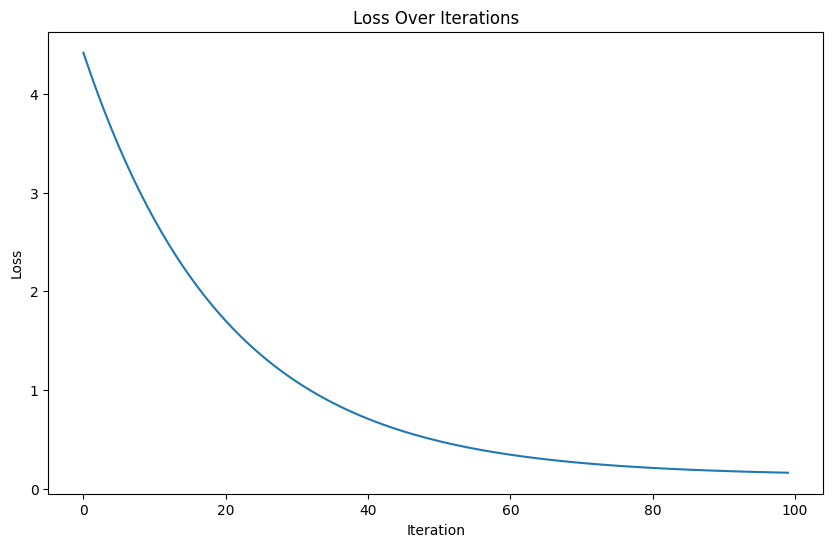

In [51]:
# train the model
trained_weights, losses = train_model(data[0], data[1], weights, iterations=100, learning_rate=0.01)
# plot the loss
plot_loss(losses)
# create a function to evaluate the model
def evaluate_model(X, y, weights):
    predictions = forward_pass(X, weights.T)
    loss = calculate_loss(weights.T, X, y)
    loss = np.mean(loss)
    print(f"Evaluation Loss: {loss}")
    return predictions

In [52]:
# print the weights
print("Trained Weights:")
print(trained_weights)

Trained Weights:
[[ 2.14290917e-01  1.18211881e-01 -5.12779444e-02  4.74505397e-01
   3.22354052e-01  6.93834555e-02 -4.02443912e-01 -1.39999678e-01
   3.97581060e-01  4.23341487e-01]
 [ 4.18201709e-01 -5.50462596e-02 -5.07741212e-02  4.33600252e-01
  -1.99152768e-01 -6.37386225e-02  4.87673487e-01  2.21861306e-01
   4.15819668e-02  4.55503014e-02]
 [ 3.20878599e-01  3.01551511e-01  3.77847258e-01 -1.89264905e-01
  -2.92159607e-01  1.61746539e-01  3.62758054e-01  2.40867120e-01
   3.83202062e-01 -2.87756467e-01]
 [ 9.88882804e-02  2.10891319e-01  4.45961406e-01 -2.85544500e-01
   1.10941904e-01  3.79537923e-01  2.79600095e-01  3.44856117e-01
  -3.82229822e-01  2.95446642e-01]
 [-3.21053748e-04 -1.17504726e-01  8.26448980e-02  3.92300699e-01
   3.60943259e-01  1.12338563e-01 -1.43197542e-01  5.54563451e-01
   9.46881421e-02 -1.66964412e-01]
 [ 6.16888957e-01 -1.81424835e-01 -6.38555984e-02  1.53326936e-01
  -1.43013059e-01  5.79935086e-01  4.28304318e-01  1.38293570e-01
  -1.09111458e-0

In [53]:
# wrap the training inside a function
def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float):
    n_samples, n_features = X.shape
    # weights = np.zeros((n_features, 1))
    weights = np.random.rand(n_features, 1)  # Initialize weights randomly

    weights = newtons_method(X, Y, max_iter=100, tolerance=1e-6)

    return weights

In [54]:
# test the linearRegression function
lr = 0.01
lambda_ = 0.1 # regularization parameter
trained_weights = linearRegression(data[0], data[1], lr, lambda_)
# evaluate the model
predictions = evaluate_model(data[0], data[1], trained_weights)
# print the predictions
print("Predictions:")
print(predictions)

Evaluation Loss: 0.09339464438718376
Predictions:
[0.58141153 0.60201517 0.50069679 0.36852052 0.48569741 0.18239205
 0.55051836 0.65089113 0.4877518  0.67682326 0.60720329 0.26083497
 0.49229555 0.34918784 0.43762015 0.448105   0.55333571 0.28722124
 0.3271599  0.5808404  0.4458428  0.52245084 0.46569935 0.64295148
 0.53634354 0.58258162 0.19491241 0.46039646 0.51782424 0.48979648
 0.65174784 0.4946488  0.44737622 0.47104476 0.51189782 0.39858781
 0.47128686 0.48175488 0.4729198  0.58081244 0.37378598 0.37844354
 0.5763796  0.41155239 0.60587197 0.46081899 0.72183582 0.3092494
 0.47956409 0.50611298 0.52043097 0.52119199 0.41770103 0.47857542
 0.30154612 0.35291126 0.43377727 0.59556218 0.52918079 0.30488345
 0.33484112 0.33456054 0.58802074 0.54405499 0.52045287 0.41129288
 0.68905143 0.47972179 0.69062402 0.51164808 0.60422173 0.5297046
 0.50522721 0.41057771 0.53043939 0.33249174 0.47031286 0.30297784
 0.66080019 0.54775419 0.68468083 0.32189208 0.41040696 0.6072748
 0.55286718 0.5